# Steps

1. Preprocess + EDA + Feature scalling
2. Extract input and outputs cols
3. scales the values
4. train test split
5. train the model
6. evaluate the model
7. deploy 

In [46]:
import pandas as pd
import numpy as np

In [6]:
df = pd.read_csv("Placementtt.csv")

In [7]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [8]:
df.shape

(100, 4)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


Preprocessing data

In [10]:
df = df.iloc[:,1:]

In [11]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


EDA

In [12]:
import matplotlib.pyplot as plt

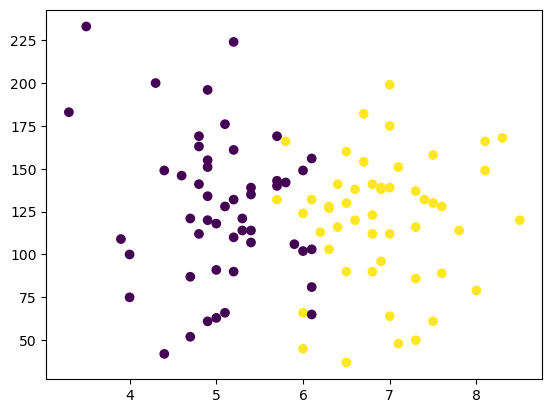

In [14]:
plt.scatter(df['cgpa'],df['iq'],c = df['placement'])

we are using logistic regression

make a dependent and independent separately

In [15]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [16]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [17]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

Now the data in train test split

In [18]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.1)

In [22]:
X_train,X_test

(    cgpa     iq
 97   6.7  182.0
 92   5.2  110.0
 44   7.5   61.0
 54   6.4  141.0
 46   5.3  114.0
 ..   ...    ...
 82   6.5   37.0
 10   6.0   45.0
 70   6.3  127.0
 3    7.4  132.0
 75   4.8  169.0
 
 [90 rows x 2 columns],
     cgpa     iq
 62   6.0  102.0
 29   7.0  112.0
 80   4.9  196.0
 86   5.1  128.0
 5    7.1   48.0
 16   5.2  224.0
 38   6.5  160.0
 57   6.5  130.0
 81   5.4  107.0
 94   4.7   52.0)

In [23]:
y_train,y_test

(97    1
 92    0
 44    1
 54    1
 46    0
      ..
 82    1
 10    1
 70    1
 3     1
 75    0
 Name: placement, Length: 90, dtype: int64,
 62    0
 29    1
 80    0
 86    0
 5     1
 16    0
 38    1
 57    1
 81    0
 94    0
 Name: placement, dtype: int64)

scalling

In [24]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()

In [25]:
X_train = scaler.fit_transform(X_train)

In [26]:
X_train

array([[ 0.5943907 ,  1.54673892],
       [-0.69361483, -0.35117212],
       [ 1.28132698, -1.64280602],
       [ 0.33678959,  0.46598402],
       [-0.60774779, -0.24573262],
       [-1.20881704,  0.5977834 ],
       [ 0.93785884,  0.72958278],
       [-0.26427965,  1.20406054],
       [-0.52188076,  0.30782477],
       [ 0.16505552, -0.27209249],
       [ 1.10959291, -1.93276465],
       [ 0.8519918 ,  1.9948568 ],
       [ 0.07918849,  0.86138215],
       [-0.95121593, -0.08757336],
       [-0.77948186, -1.51100664],
       [ 0.33678959, -0.19301287],
       [ 0.68025773,  0.46598402],
       [ 1.79652919,  1.12498091],
       [ 0.76612477,  0.41326427],
       [-1.80988629, -0.377532  ],
       [-0.52188076,  0.41326427],
       [ 0.76612477,  0.3869044 ],
       [-2.3250885 ,  1.57309879],
       [-0.52188076, -0.24573262],
       [ 0.07918849, -1.53736652],
       [ 0.07918849,  0.22874514],
       [ 0.68025773, -0.87836963],
       [-1.72401925, -1.27376776],
       [ 0.68025773,

In [28]:
X_test = scaler.transform(X_test)

In [29]:
X_test

array([[-0.00667855, -0.56205112],
       [ 0.8519918 , -0.29845237],
       [-0.95121593,  1.91577718],
       [-0.77948186,  0.12330564],
       [ 0.93785884, -1.9854844 ],
       [-0.69361483,  2.65385369],
       [ 0.42265663,  0.96682166],
       [ 0.42265663,  0.17602539],
       [-0.52188076, -0.43025175],
       [-1.12295   , -1.8800449 ]])

Train the model

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
clf = LogisticRegression()

In [33]:
clf.fit(X_train,y_train)

LogisticRegression()

evaluation model

In [38]:
y_pred = clf.predict(X_test)

In [39]:
y_test

62    0
29    1
80    0
86    0
5     1
16    0
38    1
57    1
81    0
94    0
Name: placement, dtype: int64

In [40]:
from sklearn.metrics import accuracy_score

In [41]:
accuracy_score(y_test,y_pred)

0.9

How to plot decision boundry

In [42]:
from mlxtend.plotting import plot_decision_regions

<AxesSubplot:>

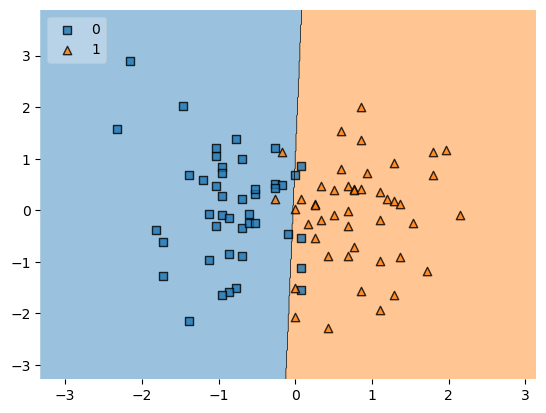

In [45]:
plot_decision_regions(X_train,y_train.values,clf = clf, legend = 2)

use pickle library that make convert any object into file